# <center>Test Stats
# <center>Prepared by Denver Lloyd
# <center>8/10/2021

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import fivecentplots as fcp
from characterization_ams.stats_engine import stats
from characterization_ams.emva import emva
from characterization_ams.unittests import image_generator
from characterization_ams.utilities import image
import pdb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
class Sequence

## Image Generator

### Generate Image

In [2]:
rows=100
cols=100
# fpn
rfpn=15
pfpn=5
cfpn=1
tot_f = np.sqrt(rfpn**2 + pfpn**2 + cfpn**2)
# temp noise
ctn = 15
rtn = 12
ptn = 20
tot_t = np.sqrt(ctn**2 + rtn**2 + ptn**2)
n_images=1000
pedestal = 168
imgs = image_generator.gen_images(cfpn=cfpn,
                                  ptn=ptn,
                                  rtn=rtn,
                                  ctn=ctn,
                                  rfpn=rfpn,
                                  pfpn=pfpn,
                                  rows=rows,
                                  cols=cols,
                                  pedestal=pedestal,
                                  n_images=n_images)

In [3]:
avg_img = stats.avg_offset(imgs)
L = len(imgs)
ttn_var = stats.total_var_temp(imgs)

### Generate Image

## Stats Engine

### Image Functions

#### Average

##### avg_img

~~~ python
"""
Take a stack of images and compute the per pixel average

Keyword Arguments:
    img_stack (np.array): stack of images

Returns:
    avg_img (np.array): 2D image of per pixel averages from img_stack
"""
~~~

In [18]:
avg_img = stats.avg_img(imgs)

# this is not 100% correct because temp and fpn stack calculated different currently 
L = len(imgs)
ttn_var = stats.noise_metrics_temp(imgs)['tot_var_temp']

In [19]:
f'expected shape = {(rows, cols)}, actual = {avg_img.shape}'

'expected shape = (100, 100), actual = (100, 100)'

In [20]:
f'expected mean = {round(pedestal,0)}, actual mean = {round(avg_img.mean(),0)}'

'expected mean = 168, actual mean = 169.0'

##### avg_offset

~~~ python
"""
compute the average of a frame, returns a scalar

keyword arguments:
    img (np.array): average image to compute mean on

Returns:
     mean (scalar)
"""
~~~

In [30]:
f_avg = stats.avg_offset(avg_img)

In [31]:
f'expected shape = {()}, actual = {f_avg.shape}'

'expected shape = (), actual = ()'

In [32]:
f'expected mean = {round(pedestal,0)}, actual mean = {round(f_avg,0)}'

'expected mean = 168, actual mean = 169.0'

##### col_avg

~~~ python
"""
get column average

Keyword Arguments:
    img (np.array): img to calcuate column average on

Returns:
    avg (np.array): 1D array of column average values
"""
~~~

In [83]:
avg_imgc = stats.col_avg(avg_img)

In [84]:
f'expected shape = {(cols,0)}, actual = {avg_imgc.shape}'

'expected shape = (100, 0), actual = (100,)'

In [85]:
f'expected mean = {round(pedestal,0)}, actual mean = {round(avg_img.mean(),0)}'

'expected mean = 168, actual mean = 169.0'

##### row_avg

~~~ python
"""
get row average

Keyword Arguments:
    img (np.array): img to calcuate row average on

Returns:
    avg (np.array): 1D array of row average values
"""
~~~

In [86]:
avg_imgr = stats.row_avg(avg_img)

In [87]:
f'expected shape = {(0,rows)}, actual = {avg_imgr.shape}'

'expected shape = (0, 100), actual = (100,)'

In [88]:
f'expected mean = {round(pedestal,0)}, actual mean = {round(avg_img.mean(),0)}'

'expected mean = 168, actual mean = 169.0'

#### FPN

##### total_var

~~~ python
"""
compute total variance from image with
residual temporal noise removed

Keyword Arguments:
    img (np.array): input image (tyically average)
    L (int): number of images used for average
    ttn_var (float): temporal noise from image stack used to get img
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn (bool, True): if True remove residual temporal noise

Returns:
    var (float): total variance of img
"""
~~~

In [89]:
total_var = stats.total_var(avg_img, L=L, ttn_var=ttn_var)

In [90]:
f'expected shape = {()}, actual = {total_var.shape}'

'expected shape = (), actual = ()'

In [91]:
f'expected std = {round(tot_f)}, actual std = {round(np.sqrt(total_var),0)}'

'expected std = 16, actual std = 15.0'

##### row_var

~~~ python
"""
compute exact solution of row variance from
image with residual temporal noise removed,
EMVA 4.0 definition

Keyword Arguments:
    img (np.array): input image (tyically average)
    L (int): number of images used for average
    ttn_var (float): temporal noise from average
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn(bool, True): if True residual temporal noise is removed

Returns:
    var (float): row variance of img
"""
~~~

In [92]:
row_var = stats.row_var(avg_img, L=L, ttn_var=ttn_var)

In [93]:
f'expected shape = {()}, actual = {row_var.shape}'

'expected shape = (), actual = ()'

In [94]:
f'expected std = {round(rfpn,0)}, actual std = {round(np.mean(np.sqrt(row_var)),0)}'

'expected std = 15, actual std = 14.0'

##### col_var

~~~ python 
"""
compute exact solution of column variance from
image with residual temporal noise removed,
EMVA 4.0 definition

Keyword Arguments:
    img (np.array): input image (tyically average)
    L (int): number of images used for average
    ttn_var (float): temporal noise from average
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn(bool, True): if True residual temporal noise is removed

Returns:
    col_var (float): column variance of img
"""
~~~

In [95]:
col_var = stats.col_var(avg_img, L=L, ttn_var=ttn_var)

In [96]:
f'expected shape = {()}, actual = {col_var.shape}'

'expected shape = (), actual = ()'

In [97]:
f'expected std = {cfpn}, actual std = {round(np.mean(np.sqrt(col_var)),0)}'

'expected std = 1, actual std = 1.0'

##### pix_var

~~~ python
"""
compute exact solution of pixel variance from
image with residual temporal noise removed,
EMVA 4.0 definition

Keyword Arguments:
    img (np.array): input image (tyically average)
    L (int): number of images used for average
    ttn_var (float): temporal noise from average
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn (bool, True): if True residual temporal noise is removed

Returns:
    var (float): pix variance of img
"""
~~~

In [98]:
pix_var = stats.pix_var(avg_img, L=L, ttn_var=ttn_var)

In [99]:
f'expected shape = {()}, actual = {pix_var.shape}'

'expected shape = (), actual = ()'

In [100]:
f'expected std = {pfpn}, actual std = {round(np.mean(np.sqrt(pix_var)),0)}'

'expected std = 5, actual std = 5.0'

##### noise_metrics (all spatial noise metrics)

~~~ python
"""
compute spatial noise metrics from an average
image with residual temporal noise removed

Keyword Arguments:
    img (np.array): input image (tyically average)
    L (int): number of images used for average
    ttn_var (float): temporal noise from image stack used to get img
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn (bool, True): if True then remove residual temporal noise

Returns:
    var (dict): row_var
                col_var
                pix_var
                tot_var
"""
~~~

In [101]:
all_var = stats.noise_metrics(avg_img, L=L, ttn_var=ttn_var)

In [102]:
all_var

{'tot_var': 235.7588341841789,
 'col_var': 1.4310741802142783,
 'row_var': 210.18618135148546,
 'pix_var': 24.387921291790175}

#### Temporal Noise

##### row_var_temp

~~~ python
"""
compute exact solution for row temporal
variance from image stack

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc

Returns:
    var (float): row temporal noise variance
"""
~~~

In [14]:
stats.row_var_temp?

In [11]:
row_var_temp = stats.row_var_temp(imgs)

In [12]:
f'expected shape = {()}, actual = {row_var_temp.shape}'

'expected shape = (), actual = ()'

In [13]:
f'expected std = {round(rtn,0)}, actual std = {round(np.sqrt(row_var_temp),0)}'

'expected std = 12, actual std = 12.0'

##### col_var_temp

~~~ python
"""
compute exact solution for column temporal
variance from image stack

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc

Returns:
    var (float): column temporal noise variance of img_stack
"""
~~~ 

In [106]:
col_var_temp = stats.col_var_temp(imgs)

In [107]:
f'expected shape = {()}, actual = {col_var_temp.shape}'

'expected shape = (), actual = ()'

In [108]:
f'expected std = {ctn}, actual std = {round(np.mean(np.sqrt(col_var_temp)),0)}'

'expected std = 15, actual std = 15.0'

##### pix_temp_var

~~~ python
"""
compute exact solution for pixel temporal
variance from image stack

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc

Returns:
    var (float): pixel temporal noise variance
"""
~~~

In [109]:
pix_var_temp = stats.pix_var_temp(imgs)

In [110]:
f'expected shape = {()}, actual = {pix_var_temp.shape}'

'expected shape = (), actual = ()'

In [111]:
f'expected std = {ptn}, actual std = {round(np.mean(np.sqrt(pix_var_temp)),0)}'

'expected std = 20, actual std = 20.0'

##### total_temp_var

~~~ python
"""
compute total temporal variance from a stack of images

Keyword Arguments:
    img_stack (np.array): stack of images

    ddof (int, 0): degree of freedom for variance calc

Returns:
    var (float): total temporal variance of img
"""
~~~

In [112]:
tot_temp_var = stats.total_var_temp(imgs)

In [113]:
f'expected shape = {()}, actual = {total_var.shape}'

'expected shape = (), actual = ()'

In [114]:
f'expected std = {round(tot_t)}, actual std = {round(np.sqrt(tot_temp_var),0)}'

'expected std = 28, actual std = 28.0'

##### tot_var_img_stack

~~~ python
"""
take a stack of images and compute
the per pixel variance (total temporal noise)

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc

Returns:
    var_im -- 2D image of pix temporal noise values
"""
~~~

In [115]:
var_img = stats.tot_var_img_stack(imgs)

In [116]:
f'expected shape = {(rows, cols)}, actual = {var_img.shape}'

'expected shape = (100, 100), actual = (100, 100)'

In [117]:
f'expected std = {round(tot_t,0)}, actual std = {round(np.sqrt(np.mean(var_img)),0)}'

'expected std = 28.0, actual std = 28.0'

##### All

~~~ python
"""
compute temporal noise metrics from a stack of images

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc

Returns:
    var (dict): row_var_temp
                col_var_temp
                pix_var_temp
                tot_var_temp
"""
~~~

In [118]:
all_temp_var = stats.noise_metrics_temp(imgs)

In [119]:
all_temp_var

{'tot_var_temp': 768.9392049380656,
 'col_var_temp': 226.09327767406074,
 'row_var_temp': 146.38983583511236,
 'pix_var_temp': 400.50156174959545}

#### Profiles

~~~ python
"""
calculate profiles for an image

Keyword Arguments:
    img (np.array): image to calculate profiles from
    horizontal (bool): if True horizontal profile is takem, else vertical

Returns:
    temp (dict): index: index of columns
                 middle: center value of columns
                 mean: mean value of columns
                 max: max value of columns
                 min: min value of columns
"""
~~~

##### Horizontal

In [120]:
stats.profile?

In [121]:
hor_profile = stats.profile(avg_img, horizontal=True)

In [122]:
df = pd.DataFrame.from_dict(hor_profile)
df.head()

,index_horizontal,middle_horizontal,mean_horizontal,max_horizontal,min_horizontal
0,0,167.973045,169.495128,207.166958,138.464722
1,1,164.890533,168.585007,208.222931,130.602700
2,2,161.581398,167.648894,208.665913,132.351523
3,3,171.613270,170.471521,209.306863,136.195938
4,4,168.882516,168.914375,205.053946,133.755753


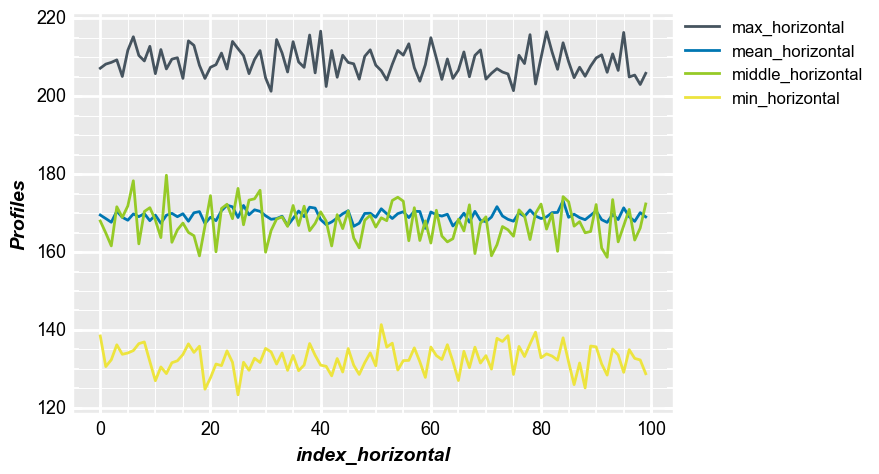

In [123]:
fcp.plot(df=df, x='index_horizontal', y=['max_horizontal','mean_horizontal','middle_horizontal','min_horizontal'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

##### Vertical

In [125]:
dfv = pd.DataFrame.from_dict(vert_profile)
dfv.head()

,index_vertical,middle_vertical,mean_vertical,max_vertical,min_vertical
0,0,185.475263,187.885485,203.697371,176.250493
1,1,170.671780,179.308645,193.168660,168.572352
2,2,136.598269,144.116578,154.204970,128.803650
3,3,166.464104,167.222700,183.380353,154.235420
4,4,175.781185,177.777046,190.096107,165.501712


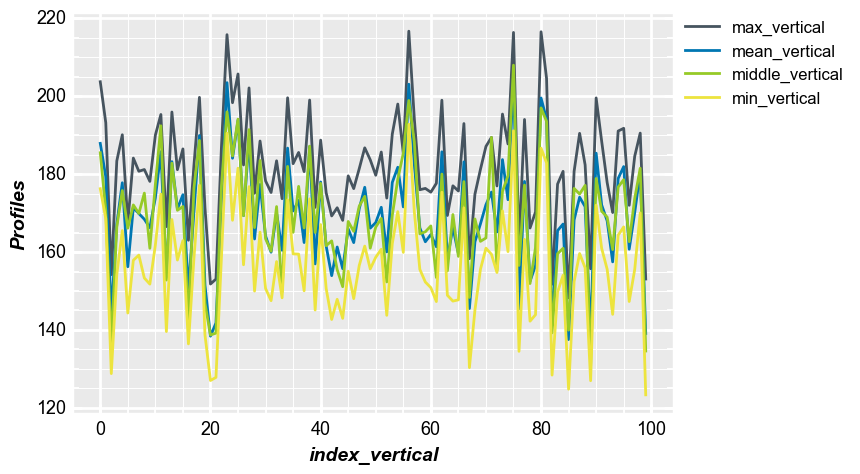

In [126]:
fcp.plot(df=dfv, x='index_vertical', y=['max_vertical','mean_vertical','middle_vertical','min_vertical'],
         ax_size=[600,400], grid_minor=True, markers=False, line_width=2, label_y='Profiles')

#### Agg Functions

##### agg_results

~~~ python
    """
    get standard deviation and variancefor all
    fpn and temporal noise components

    Keyword Arguments:
        img_stack (np.array): stack of images
        ddof (int, 0) degree of freedom for variance calc
        rename (bool, False): rename the column names for plotting

    Returns:
        stats (df) dataframe of summary stats
    """
~~~

In [9]:
agg_results = stats.agg_results(imgs, rename=True, include_var=False)

In [10]:
agg_results

,Total FPN [DN],Pix FPN [DN],Col FPN [DN],Row FPN [DN],Total Temp Noise [DN],Pix Temp Noise [DN],Col Temp Noise [DN],Row Temp Noise [DN],CFPN Ratio,RFPN Ratio,STN Ratio,Total FPN [%],Pix FPN [%],Col FPN [%],Row FPN [%],CTN Ratio,RTN Ratio,Mean Signal [DN]
0,15.316,4.907,1.171,14.462,27.731,19.914,15.04,12.093,23.676,1.918,0.552,9.046,2.898,0.692,8.542,1.844,2.293,169.308


##### agg_results_spatial

~~~ python
    """
    get standard deviation and variancefor all
    fpn and temporal noise components

    Keyword Arguments:
        img_stack (np.array): stack of images
        ddof (int, 0) degree of freedom for variance calc
        rename (bool, False): rename the column names for plotting
        L (int, 1): size of image stack
        ttn_var (float, 0): total temporal variance from image stack
                            default is 0 so if not passed no residual
                            temporal noise is removed

    Returns:
        stats (df) dataframe of summary stats
    """
~~~

In [15]:
img = stats.avg_img(imgs)
agg_results = stats.agg_results_spatial(img, rename=True, include_var=False)

In [16]:
agg_results

,Total FPN [DN],Pix FPN [DN],Col FPN [DN],Row FPN [DN],CFPN Ratio,RFPN Ratio,STN Ratio,Total FPN [%],Pix FPN [%],Col FPN [%],Row FPN [%],CTN Ratio,RTN Ratio,Mean Signal [DN]
0,15.341,4.985,1.171,14.462,NaN,NaN,NaN,9.061,2.944,0.692,8.542,NaN,NaN,169.308


##### noise_metrics_all

~~~ python
"""
compute spatial and temporal noise metrics from a stack
of images

Keyword Arguments:
    img_stack (np.array): stack of images
    ddof (int, 0): degree of freedom for variance calc
    rmv_ttn (bool, True): if True remove residual temporal noise
                          from spatial variance
Returns:
    all_var (dict): row_var
                    col_var
                    pix_var
                    tot_var
                    row_temp_var
                    col_temp_var
                    pix_temp_var
                    tot_temp_var
                    mean
"""
~~~

In [129]:
all_v = stats.noise_metrics_all(imgs)
all_v

{'tot_var': 235.75960312338387,
 'col_var': 1.4310741802142781,
 'row_var': 210.18618135148546,
 'pix_var': 24.388698077313553,
 'tot_var_temp': 768.9392049380656,
 'col_var_temp': 226.09327767406074,
 'row_var_temp': 146.38983583511236,
 'pix_var_temp': 400.50156174959545,
 'mean': 169.28458341062117}

In [130]:
col_var_temp = np.mean(imgs, axis=1).var(ddof=1)**.5
row_var_temp = np.mean(imgs, axis=2).var(ddof=1)**.5
tot_var_temp = np.var(imgs, axis=0, ddof=1).mean()